In [1]:
import csv
import sys
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sys.executable

'C:\\Users\\Som\\Anaconda3\\envs\\ai\\python.exe'

In [2]:
from IPython.display import display

In [3]:
train_data=pd.read_csv('C:/Users/Som/AI Workshop/Titanic Forecast/data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data=pd.read_csv('C:/Users/Som/AI Workshop/Titanic Forecast/data/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train2=train_data.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)
test2=test_data.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)

In [9]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [7]:
train2[train2['Embarked'].isnull()]

train2['Embarked'].mode()
most_embarked=train2['Embarked'].mode()[0]
train2['Embarked']=most_embarked

In [8]:
train2[train2['Embarked'].isnull()]
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [38]:
def fill_age(df):
#     Iterate over ser features
    for s in ['male','female']:
        for c in [1,2,3]:
            truth_table=(df['Sex']==s) & (df['Pclass']==c)
#             print(truth_table)
            temp_df =df[truth_table]['Age'].dropna() #drop all rows that have NaN as Age
            median_age=temp_df.median()
#             print(s,c,median_age)
            df.loc[(df.Age.isnull())&(df.Sex==s)&(df.Pclass==c),'Age']=median_age

In [26]:
fill_age(train2)
train2.info()
train2[train2['Age'].isnull()]

880
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [27]:
fill_age(test2)
test2.info()

332
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [15]:
def show_corr(df):
    _,ax=plt.subplots(figsize=(8,6))
#     Colormap:colors to denote the correlation values
    cmap=sns.diverging_palette(250,10,s=68,l=40,as_cmap=True)
#     Plotting heatmap using seaborn
    sns.heatmap(df.corr(),cmap=cmap,vmin=-1,vmax=1,annot=True)

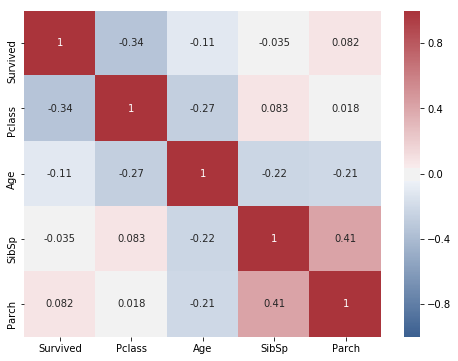

In [16]:
show_corr(train2)

Convert feature to numerical

In [28]:
num_mapper={
        'Embarked':{'C':1,'S':2,'Q':3},
        'Sex':{'male':1,'female':2},
}
train2=train2.replace(num_mapper)
test2=test2.replace(num_mapper)

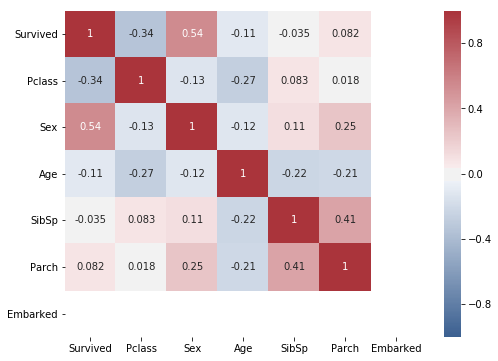

In [18]:
show_corr(train2)

In [29]:
train2_x=train2.drop(['Survived'],axis=1)
train2_y=train2['Survived']

In [20]:

predection1=clf_rf.predict(test1)

NameError: name 'clf_rf' is not defined

In [ ]:
kgl_submit_csv(test_data,predection1,"som_prediction.csv")

In [30]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [31]:
train2_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
dtypes: float64(1), int64(5)
memory usage: 41.8 KB


In [32]:
trainx=train2_x.values
trainx

array([[  3.,   1.,  22.,   1.,   0.,   2.],
       [  1.,   2.,  38.,   1.,   0.,   2.],
       [  3.,   2.,  26.,   0.,   0.,   2.],
       ..., 
       [  3.,   2.,  35.,   1.,   2.,   2.],
       [  1.,   1.,  26.,   0.,   0.,   2.],
       [  3.,   1.,  32.,   0.,   0.,   2.]])

In [33]:
trainy=train2_y.values
trainy

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [34]:
model=Sequential()
# adding a new layer
model.add(Dense(8,input_dim=6,activation='relu')) #Dense-> fully connected Layer, weight range -1 to 1
# adding a new layer
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) #adam ->advance version of gradient descent

In [36]:
history_object=model.fit(trainx,trainy,epochs=40,batch_size=40,verbose=2,validation_split=0.1,shuffle=False)

Train on 801 samples, validate on 90 samples
Epoch 1/40
 - 0s - loss: 5.3744 - acc: 0.6155 - val_loss: 4.9330 - val_acc: 0.6222
Epoch 2/40
 - 0s - loss: 5.0491 - acc: 0.6155 - val_loss: 4.4500 - val_acc: 0.6222
Epoch 3/40
 - 0s - loss: 4.3064 - acc: 0.6155 - val_loss: 3.5183 - val_acc: 0.6222
Epoch 4/40
 - 0s - loss: 3.0296 - acc: 0.6155 - val_loss: 2.2453 - val_acc: 0.6222
Epoch 5/40
 - 0s - loss: 1.7852 - acc: 0.6155 - val_loss: 1.1717 - val_acc: 0.6222
Epoch 6/40
 - 0s - loss: 0.9084 - acc: 0.6105 - val_loss: 0.7386 - val_acc: 0.5556
Epoch 7/40
 - 0s - loss: 0.7465 - acc: 0.5044 - val_loss: 0.7340 - val_acc: 0.5222
Epoch 8/40
 - 0s - loss: 0.7411 - acc: 0.5705 - val_loss: 0.7274 - val_acc: 0.5889
Epoch 9/40
 - 0s - loss: 0.7365 - acc: 0.5893 - val_loss: 0.7198 - val_acc: 0.5778
Epoch 10/40
 - 0s - loss: 0.7305 - acc: 0.5868 - val_loss: 0.7135 - val_acc: 0.5889
Epoch 11/40
 - 0s - loss: 0.7262 - acc: 0.5943 - val_loss: 0.7074 - val_acc: 0.5889
Epoch 12/40
 - 0s - loss: 0.7214 - acc: 